#Import all necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.utils import resample, shuffle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Read the data into dataframe & EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data03_ccFraud.csv')
df.head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column        Dtype
---  ------        -----
 0   custID        int64
 1   gender        int64
 2   state         int64
 3   cardholder    int64
 4   balance       int64
 5   numTrans      int64
 6   numIntlTrans  int64
 7   creditLine    int64
 8   fraudRisk     int64
dtypes: int64(9)
memory usage: 686.6 MB


In [ ]:
df.describe()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,1.382177e+00,2.466127e+01,1.030004e+00,4.109920e+03,2.893519e+01,4.047190e+00,9.134469e+00,5.960140e-02
std,2.886751e+06,4.859195e-01,1.497012e+01,1.705991e-01,3.996847e+03,2.655378e+01,8.602970e+00,9.641974e+00,2.367469e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.500001e+06,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,0.000000e+00
50%,5.000000e+06,1.000000e+00,2.400000e+01,1.000000e+00,3.706000e+03,1.900000e+01,0.000000e+00,6.000000e+00,0.000000e+00
75%,7.500000e+06,2.000000e+00,3.800000e+01,1.000000e+00,6.000000e+03,3.900000e+01,4.000000e+00,1.100000e+01,0.000000e+00
max,1.000000e+07,2.000000e+00,5.100000e+01,2.000000e+00,4.148500e+04,1.000000e+02,6.000000e+01,7.500000e+01,1.000000e+00


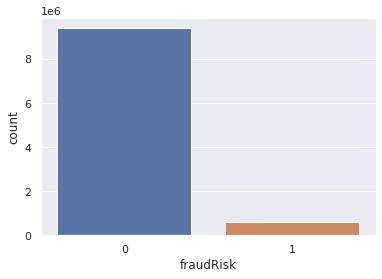

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="fraudRisk", data=df)

In [ ]:
df.fraudRisk.value_counts()

0    9403986
1     596014
Name: fraudRisk, dtype: int64

# Data Preprocessing

In [ ]:
# As each ID is unique, it is not helpful in model training
# Thus this feature is dropped 
df = df.drop(["custID"], axis=1)

In [ ]:
df.head()

,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,35,1,3000,4,14,2,0
1,2,2,1,0,9,0,18,0
2,2,2,1,0,27,9,16,0
3,1,15,1,0,12,0,5,0
4,1,46,1,0,11,16,7,0


In [ ]:
# Scale the independent variables
y = df["fraudRisk"].values  # target attributes
X = df.drop(["fraudRisk"], axis=1) # input attributes


x_scale = preprocessing.MinMaxScaler().fit_transform(X.values)



#Standard ML training and evaluation 

In [ ]:
# reduce the size of the data as it takes too long for training
reduce_x, large_x, reduce_y, large_y = train_test_split(x_scale, y,
                                                  test_size=0.98, stratify=y)

# data splitting
train_x, val_x, train_y, val_y = train_test_split(reduce_x, reduce_y,
                                                  test_size=0.4, stratify=reduce_y)


## Apply Resampling Technique

In [ ]:
# resample the train data by rising the fraud sample
normal = train_x[train_y==0]
fraud = train_x[train_y==1]

print("Normal:",normal.shape)
print("Fraud:",fraud.shape)
print("Y shape:",train_y.shape)

Normal: (112848, 7)
Fraud: (7152, 7)
Y shape: (120000,)


In [ ]:
# Increase the number of fraud to 20% of the normal
upsample_fraud = resample(fraud,
                          replace=True,
                          n_samples=int(normal.shape[0]/5))
print("Fraud upsample:",upsample_fraud.shape)
# Join the fraud upsample with normal
resample_data = np.concatenate((normal, upsample_fraud), axis=0)
print("Combine:",resample_data.shape)

Fraud upsample: (22569, 7)
Combine: (135417, 7)


In [ ]:
# join back fraud and normal data to train_x, train_y
train_x = resample_data
train_y = np.append(np.zeros(normal.shape[0]),np.ones(upsample_fraud.shape[0]))

train_x, train_y = shuffle(train_x,train_y,random_state = 0)
print("Y shape:",train_y.shape, "X shape", train_x.shape)

Y shape: (135417,) X shape (135417, 7)


## Supervised ML techniques

### DT

In [ ]:
# Decision Tree
DT_clf = DecisionTreeClassifier().fit(train_x, train_y)
# tree.plot_tree(DT_clf)

In [ ]:
# DT Performance Evaluation
pred_y_DT = DT_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_DT))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_DT, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_DT))
precision = precision_score(val_y, pred_y_DT)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_DT)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_DT))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_DT))





Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     75232
           1       0.46      0.48      0.47      4768

    accuracy                           0.94     80000
   macro avg       0.72      0.72      0.72     80000
weighted avg       0.94      0.94      0.94     80000


Confusion Matrix: 
 [[ 2278  2490]
 [ 2635 72597]]
Accuracy Score:  0.9359375
Precision Score:  0.46366782006920415
Recall Score:  0.4777684563758389
F1 Score:  0.47061254002685676
ROC AUC:  0.7213717335048059


### LR

In [ ]:
# Logistic regression
LR_clf = LogisticRegression().fit(train_x, train_y)


In [ ]:
# LR Performance Evaluation
pred_y_LR = LR_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_LR))
precision = precision_score(val_y, pred_y_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_LR))





Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     75232
           1       0.56      0.69      0.62      4768

    accuracy                           0.95     80000
   macro avg       0.77      0.83      0.80     80000
weighted avg       0.96      0.95      0.95     80000


Confusion Matrix: 
 [[ 3303  1465]
 [ 2565 72667]]
Accuracy Score:  0.949625
Precision Score:  0.5628834355828221
Recall Score:  0.6927432885906041
F1 Score:  0.6210981572019557
ROC AUC:  0.8293243771749277


### SVM

In [ ]:
# Support Vector Machine
SVM_clf = svm.SVC().fit(train_x, train_y)


In [ ]:
# SVM Performance Evaluation
pred_y_SVM = SVM_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_SVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_SVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_SVM))
precision = precision_score(val_y, pred_y_SVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_SVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_SVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_SVM))




Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     75232
           1       0.59      0.66      0.62      4768

    accuracy                           0.95     80000
   macro avg       0.79      0.81      0.80     80000
weighted avg       0.96      0.95      0.95     80000


Confusion Matrix: 
 [[ 3127  1641]
 [ 2135 73097]]
Accuracy Score:  0.9528
Precision Score:  0.5942607373622197
Recall Score:  0.6558305369127517
F1 Score:  0.6235294117647059
ROC AUC:  0.8137258277928284


### KNN

In [ ]:
# K Nearest Neighbors
KNN_clf = KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

In [ ]:
# KNN Performance Evaluation
pred_y_KNN = KNN_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_KNN))
precision = precision_score(val_y, pred_y_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_KNN))




Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     75232
           1       0.44      0.60      0.51      4768

    accuracy                           0.93     80000
   macro avg       0.71      0.78      0.73     80000
weighted avg       0.94      0.93      0.94     80000


Confusion Matrix: 
 [[ 2866  1902]
 [ 3701 71531]]
Accuracy Score:  0.9299625
Precision Score:  0.4364245469773108
Recall Score:  0.6010906040268457
F1 Score:  0.505690339655933
ROC AUC:  0.7759480561605941


### RF

In [ ]:
# Random Forrest
RF_clf = RandomForestClassifier().fit(train_x, train_y)

In [ ]:
# RF Performance Evaluation
pred_y_RF = RF_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))




Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     75232
           1       0.61      0.53      0.57      4768

    accuracy                           0.95     80000
   macro avg       0.79      0.76      0.77     80000
weighted avg       0.95      0.95      0.95     80000


Confusion Matrix: 
 [[ 2550  2218]
 [ 1634 73598]]
Accuracy Score:  0.95185
Precision Score:  0.6094646271510517
Recall Score:  0.5348154362416108
F1 Score:  0.5697050938337802
ROC AUC:  0.7565479775848633


## Unsupervised ML techniques

###K means

In [ ]:
## K means
Kmeans_clf = KMeans().fit(train_x)

In [ ]:
# Predict the top 3% farthest points from center as anomaly
clusters_y_Kmeans = Kmeans_clf.predict(val_x)

clusters_centers=Kmeans_clf.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(val_x,clusters_centers[clusters_y_Kmeans])]

pred_y_Kmeans=np.array(dist)
pred_y_Kmeans[dist>=np.percentile(dist,97)]=1
pred_y_Kmeans[dist<np.percentile(dist,97)]=0

# Kmeans Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_Kmeans))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_Kmeans, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_Kmeans))
precision = precision_score(val_y, pred_y_Kmeans)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_Kmeans)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_Kmeans))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_Kmeans))




Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     75232
           1       0.28      0.14      0.18      4768

    accuracy                           0.93     80000
   macro avg       0.61      0.56      0.57     80000
weighted avg       0.91      0.93      0.92     80000


Confusion Matrix: 
 [[  661  4107]
 [ 1739 73493]]
Accuracy Score:  0.926925
Precision Score:  0.27541666666666664
Recall Score:  0.13863255033557048
F1 Score:  0.18443080357142858
ROC AUC:  0.5577586932877343


### OCSVM

In [ ]:
## One-Class SVM
OCSVM_clf = OneClassSVM(gamma='auto', nu=0.1).fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_OCSVM = OCSVM_clf.predict(val_x)
pred_y_OCSVM [pred_y_OCSVM ==1] = 0
pred_y_OCSVM [pred_y_OCSVM ==-1] = 1

# One-Class SVM Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_OCSVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_OCSVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_OCSVM))
precision = precision_score(val_y, pred_y_OCSVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_OCSVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_OCSVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_OCSVM))




Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     75232
           1       0.22      0.45      0.30      4768

    accuracy                           0.87     80000
   macro avg       0.59      0.67      0.61     80000
weighted avg       0.92      0.87      0.89     80000


Confusion Matrix: 
 [[ 2138  2630]
 [ 7447 67785]]
Accuracy Score:  0.8740375
Precision Score:  0.22305685967657798
Recall Score:  0.4484060402684564
F1 Score:  0.297916811816345
ROC AUC:  0.6747094535668101


### Isolation Forest

In [ ]:
## Isolation Forest
IsoF_clf = IsolationForest().fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_IsoF = IsoF_clf.predict(val_x)
pred_y_IsoF [pred_y_IsoF ==1] = 0
pred_y_IsoF [pred_y_IsoF ==-1] = 1

# Isolation Forest Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF))
precision = precision_score(val_y, pred_y_IsoF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF))




Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     75232
           1       0.21      0.87      0.34      4768

    accuracy                           0.80     80000
   macro avg       0.60      0.83      0.61     80000
weighted avg       0.94      0.80      0.85     80000


Confusion Matrix: 
 [[ 4159   609]
 [15437 59795]]
Accuracy Score:  0.799425
Precision Score:  0.21223719126352317
Recall Score:  0.8722734899328859
F1 Score:  0.341405352158923
ROC AUC:  0.8335407751663579


## Hybrid Model

### LR --> IsoF (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by LR will go through
# 2nd prediction by using IsoF

pred_y_LR_IsoF = IsoF_clf.predict(val_x[pred_y_LR==0])
pred_y_LR_IsoF [pred_y_LR_IsoF ==1] = 0
pred_y_LR_IsoF [pred_y_LR_IsoF ==-1] = 1


pred_y_LR[pred_y_LR==0] = pred_y_LR_IsoF



In [ ]:
# LR_IsoF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_LR))
precision = precision_score(val_y, pred_y_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_LR))



Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     75232
           1       0.21      0.88      0.34      4768

    accuracy                           0.80     80000
   macro avg       0.60      0.83      0.61     80000
weighted avg       0.94      0.80      0.85     80000


Confusion Matrix: 
 [[ 4175   593]
 [15484 59748]]
Accuracy Score:  0.7990375
Precision Score:  0.2123709242586093
Recall Score:  0.8756291946308725
F1 Score:  0.3418348548737053
ROC AUC:  0.834906260437512


### SVM --> IsoF (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by svm will go through
# 2nd prediction by using IsoF

pred_y_SVM_IsoF = IsoF_clf.predict(val_x[pred_y_SVM==0])
pred_y_SVM_IsoF [pred_y_SVM_IsoF ==1] = 0
pred_y_SVM_IsoF [pred_y_SVM_IsoF ==-1] = 1


pred_y_SVM[pred_y_SVM==0] = pred_y_SVM_IsoF

In [ ]:
# SVM_IsoF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_SVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_SVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_SVM))
precision = precision_score(val_y, pred_y_SVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_SVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_SVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_SVM))


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     75232
           1       0.21      0.87      0.34      4768

    accuracy                           0.80     80000
   macro avg       0.60      0.83      0.61     80000
weighted avg       0.94      0.80      0.85     80000


Confusion Matrix: 
 [[ 4160   608]
 [15440 59792]]
Accuracy Score:  0.7994
Precision Score:  0.21224489795918366
Recall Score:  0.87248322147651
F1 Score:  0.3414313854235062
ROC AUC:  0.8336257026140526


### IsoF --> LR (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by IsoF will go through
# 2nd prediction by using LR

pred_y_IsoF_LR = pred_y_IsoF.copy()

pred_y_IsoF_LR[pred_y_IsoF_LR==1] = LR_clf.predict(val_x[pred_y_IsoF_LR==1])


In [ ]:
# IsoF_LR Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF_LR))
precision = precision_score(val_y, pred_y_IsoF_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF_LR))


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     75232
           1       0.57      0.69      0.62      4768

    accuracy                           0.95     80000
   macro avg       0.77      0.83      0.80     80000
weighted avg       0.96      0.95      0.95     80000


Confusion Matrix: 
 [[ 3287  1481]
 [ 2518 72714]]
Accuracy Score:  0.9500125
Precision Score:  0.5662360034453058
Recall Score:  0.6893875838926175
F1 Score:  0.6217724392320061
ROC AUC:  0.8279588919037736


### IsoF --> SVM (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by IsoF will go through
# 2nd prediction by using svm

pred_y_IsoF_SVM = pred_y_IsoF.copy()

pred_y_IsoF_SVM[pred_y_IsoF_SVM==1] = SVM_clf.predict(val_x[pred_y_IsoF_SVM==1])

In [ ]:
# IsoF_SVM Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF_SVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF_SVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF_SVM))
precision = precision_score(val_y, pred_y_IsoF_SVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF_SVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF_SVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF_SVM))


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     75232
           1       0.59      0.66      0.62      4768

    accuracy                           0.95     80000
   macro avg       0.79      0.81      0.80     80000
weighted avg       0.96      0.95      0.95     80000


Confusion Matrix: 
 [[ 3126  1642]
 [ 2132 73100]]
Accuracy Score:  0.952825
Precision Score:  0.5945226321795359
Recall Score:  0.6556208053691275
F1 Score:  0.6235786953919807
ROC AUC:  0.8136409003451337


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
